# Test ZTF database 

In this demo we will show some basics queries that can be done with the ztf database of ALeRCE.
We will use Python and PostgreSQL, using the psycopg2 package. 

If you need information about the tables available or about the content of each table you can look at: https://github.com/alercebroker/ztf_db


Let's start importing some python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2 #package to use postgreSQL from python


Now, we will connect to the alerce data base

In [2]:
# Connect to the ALeRCE database

param = {"dbname" : "ztf_pipeline", "user" : "alerce_user", "host": "alerce.reuna.cl", "password" : "6ja.V#"}

#param = {"dbname" : "ztf", "user" : "alerceread", "host": "3.214.224.132", "password" : "alerce2019"}


conn = psycopg2.connect(dbname=param['dbname'], user=param['user'], host=param['host'], password=param['password'])

# Open a cursor to perform database operations
cur = conn.cursor()



Let's create a function that will help us to do SQL queries with psycopg2:

In [3]:
 def sql_query(query):
    cur.execute(query)
    result = cur.fetchall()
    
    # Extract the column names
    col_names = []
    for elt in cur.description:
        col_names.append(elt[0])

    #Convert to dataframe
    df = pd.DataFrame(np.array(result), columns = col_names)
    return(df)

Now, we will perform a basic search in the data base. If we want to look for all the detections of the source with ID: ZTF17aaantxj, we can do the following:

In [4]:
query = "select jd, fid, ra, dec, magpsf_corr, sigmapsf_corr from detections where oid='ZTF17aaantxj' "

df1 = sql_query(query)

df1 = df1.sort_values(['jd'])
display(df1)

,jd,fid,ra,dec,magpsf_corr,sigmapsf_corr
9,58390.501968,2.0,129.079846,21.351412,17.443812,0.034267
10,58427.462813,2.0,129.079805,21.351416,16.850836,0.025143
11,58430.497546,2.0,129.079749,21.351473,17.911506,0.031049
12,58440.505498,2.0,129.079805,21.351381,18.196728,0.054063
13,58443.461331,2.0,129.079785,21.351461,17.399881,0.025283
14,58481.422431,2.0,129.079727,21.351416,17.907421,0.032204
1,58486.421782,1.0,129.079769,21.351436,17.179602,0.034525
2,58491.440046,1.0,129.079736,21.351291,17.855199,0.037491
15,58492.477731,2.0,129.079809,21.351375,17.356690,0.025704
3,58495.257651,1.0,129.079730,21.351441,17.945551,0.053706


We can plot the obtained light curve in the different bands:

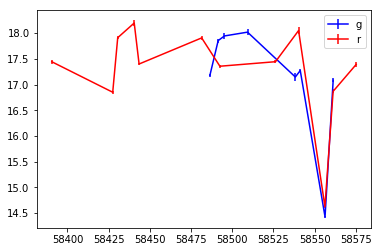

In [5]:
df1_1 = df1[df1['fid'] == 1]
df1_2 = df1[df1['fid'] == 2]

plt.errorbar(df1_1['jd'].astype(float) ,df1_1['magpsf_corr'].astype(float),yerr=df1_1['sigmapsf_corr'].astype(float), color='blue',ecolor='blue',label='g')
plt.errorbar(df1_2['jd'].astype(float) ,df1_2['magpsf_corr'].astype(float),yerr=df1_2['sigmapsf_corr'].astype(float), color='red',ecolor='red',label='r')
plt.legend()


 

Now, let's do a more complex query. If we want all the sources from the "probabilties" table, with a high probability of being a source classified as "sne", having access to the coordinates of the sources and the number of epochs, we can do the following:

In [6]:
query='''
select probabilities.oid, probabilities.other_prob, objects.meanra, 
objects.meandec, objects.nobs, objects.mean_magpsf_g, objects.mean_magpsf_g

from probabilities 

inner join objects
on probabilities.oid=objects.oid

where probabilities.sne_prob>0.7
'''


df2 = sql_query(query)

display(df2)

,oid,other_prob,meanra,meandec,nobs,mean_magpsf_g,mean_magpsf_g
0,ZTF18aazjztm,0.06,260.101636606667,55.2146383266667,15,19.1874316533407,19.1874316533407
1,ZTF18abmrzun,0.088,349.935327876744,22.5023503488372,43,20.2033980687459,20.2033980687459
2,ZTF18abucflq,0.106,290.869476072,42.183264108,25,19.7711365222931,19.7711365222931
3,ZTF18abvglon,0.1,153.584318252632,56.3212269631579,19,20.4091879526774,20.4091879526774
4,ZTF18acbxsge,0.126,9.80091044285714,-5.20070734761905,21,18.1390607357025,18.1390607357025
5,ZTF18acbznkf,0.12,166.634221546154,58.0790158153846,13,19.2483809789022,19.2483809789022
6,ZTF18aahksyi,0.1,202.431645828571,31.8935400742857,35,19.3075884305514,19.3075884305514
7,ZTF18aaisuhc,0.106,172.212759085,23.176967235,20,19.4833013746474,19.4833013746474
8,ZTF18aceyyly,0.116,185.498129547222,56.5398470138889,36,18.5369597684028,18.5369597684028
9,ZTF18acvgjqv,0.114,134.075037840741,52.5494659185185,27,19.2377252578735,19.2377252578735


Let's plot the coordinates of al these sources:

Text(0, 0.5, 'dec')

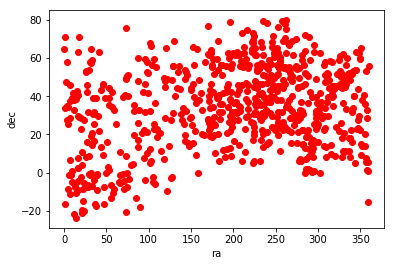

In [7]:
plt.plot(df2['meanra'].astype(float),df2['meandec'].astype(float),'ro')
plt.xlabel('ra')
plt.ylabel('dec')

Now if we want to obtain the light curve of the source with the largest number of ephocs, we can do the following:

ID with maximum number of observations:  ZTF18abcfdzu


,oid,ra,dec,fid,jd,magpsf_corr,sigmapsf_corr
0,ZTF18abcfdzu,230.2172041,54.2155942,1,58290.2010995001,19.8409748077393,0.182884991168976
33,ZTF18abcfdzu,230.2172189,54.2155163,2,58290.2621644,19.9484424591064,0.188140884041786
34,ZTF18abcfdzu,230.217238,54.2155212,2,58291.2645601998,20.1375598907471,0.210432842373848
1,ZTF18abcfdzu,230.2170888,54.2155429,1,58293.2012847001,19.7084693908691,0.196374148130417
35,ZTF18abcfdzu,230.2171949,54.2155202,2,58293.2470139,19.6831932067871,0.145388498902321
36,ZTF18abcfdzu,230.2171246,54.2155012,2,58294.2413773001,19.6257457733154,0.145378559827805
37,ZTF18abcfdzu,230.2171164,54.2154732,2,58297.3009259002,19.4432010650635,0.181374505162239
2,ZTF18abcfdzu,230.217144,54.2155562,1,58299.1793980999,19.4939136505127,0.142742544412613
3,ZTF18abcfdzu,230.2171543,54.2156067,1,58300.2209490999,19.5209846496582,0.130015000700951
4,ZTF18abcfdzu,230.2171458,54.2155543,1,58302.1979398001,19.5058212280273,0.169038847088814


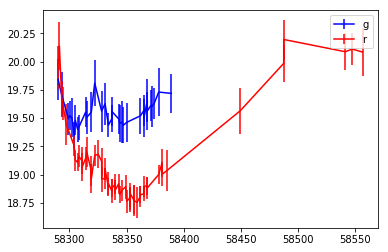

In [13]:
max_nobs_id = df2[df2.nobs == df2.nobs.max()]['oid'].values[0]
print("ID with maximum number of observations: ",max_nobs_id)

query="select oid, ra, dec, fid, jd, magpsf_corr, sigmapsf_corr from detections where oid='"+max_nobs_id+"'"

df3 = sql_query(query)

df3 = df3.sort_values(['jd'])
#display(df3)
display(df3.head(n=10))

df3_1 = df3[df3['fid']=='1']
df3_2 = df3[df3['fid']=='2']


plt.errorbar(df3_1['jd'].astype(float) ,df3_1['magpsf_corr'].astype(float),yerr=df3_1['sigmapsf_corr'].astype(float), color='blue',ecolor='blue',label='g')
plt.errorbar(df3_2['jd'].astype(float) ,df3_2['magpsf_corr'].astype(float),yerr=df3_2['sigmapsf_corr'].astype(float), color='red',ecolor='red',label='r')
plt.legend()

Now, let's define some variability features. The probability that the source is intrinsically variable ($P_{var}$):

$$\chi^2=\sum_{i=1}^{N_{obs}}\frac{(x_i-\bar{x})^2}{\sigma^2_{err,i}}$$
$$P_{var}=P(\chi^2)$$ 

And the excess variance ($\sigma_{rms}$), which a measure of the intrinsic variability amplitude:

$$\sigma^2_{rms}=\frac{1}{N_{obs}\bar{x}^2}\sum^{N_{obs}}_{i=1}[(x_i-\bar{x})^2-\sigma^2_{err,i}]$$

In [14]:
def var_parameters(jd,mag,err):
    """function to calculate the probability of a light curve to be variable and the excess variance"""
    
    from scipy.stats import chi2
    
    mean=np.mean(mag)
    nepochs=float(len(jd))

    #P_var
    chi= np.sum( (mag - mean)**2. / err**2. )
    P_var=chi2.cdf(chi,(nepochs-1))

    #ex_var
    a=(mag-mean)**2
    ex_var=(np.sum(a-err**2)/((nepochs*(mean**2))))
    

    return [P_var,ex_var]

We can estimate these variability features for the previous light curve:

In [16]:
P_var, ex_var = var_parameters(df3_2['jd'].astype(float) ,df3_2['magpsf_corr'].astype(float),df3_2['sigmapsf_corr'].astype(float))
print(P_var, ex_var)

1.0 0.00042510167372398393


Finally, if we want to obtain the newest (last week for instance) alerts produced by ZTF, we can do the following:

58619.0


,candid,oid,jd,fid,diffmaglim,magpsf,magap,sigmapsf,sigmagap,ra,...,field,rcid,magnr,sigmagnr,rb,magpsf_corr,magap_corr,sigmapsf_corr,sigmagap_corr,id
94,868160122915010000,ZTF17aaajffd,58622.2,1,18.8304,17.7904,18.1277,0.0928479,0.1993,153.594,...,712,29,17.111,0.021,0.858571,16.6458,16.7519,0.0351287,0.0581199,None
160,868160126115010007,ZTF17aaajffz,58622.2,1,18.6018,18.3394,18.2314,0.152357,0.2407,153.295,...,712,61,16.976,0.019,0.872857,16.7039,16.679,0.0360002,0.0588822,None
358,868159662115015002,ZTF17aaajfgj,58622.2,1,18.8354,17.4848,17.497,0.0812138,0.1137,157.014,...,668,21,16.153,0.018,0.918571,15.7168,15.7192,0.01951,0.0248221,None
495,868160122415010001,ZTF17aaajfgk,58622.2,1,18.8082,13.1064,13.1228,0.0220856,0.0025,157.466,...,712,24,12.967,0.011,0.62,12.1972,12.2043,0.012797,0.00862976,None
617,868161061115010000,ZTF17aaajfgl,58622.2,1,18.5605,18.3253,18.3103,0.164618,0.3128,156.188,...,752,11,15.887,0.013,0.822857,15.7778,15.7763,0.0196586,0.0325099,None
546,868161066315015012,ZTF17aaajfhf,58622.2,1,18.554,15.894,15.9005,0.0737607,0.0359,153.379,...,752,63,14.287,0.012,0.784286,13.4591,13.4598,0.0132809,0.0113827,None
825,868162465815010001,ZTF17aaajfia,58622.2,1,18.7672,15.6943,15.6789,0.0425768,0.0228,162.898,...,818,58,13.847,0.009,0.85,13.0523,13.0509,0.0133068,0.0129156,None
164,868162462015010004,ZTF17aaajfic,58622.2,1,18.6099,17.223,17.2058,0.0597659,0.0993,168.864,...,818,20,15.953,0.015,0.942857,15.7312,15.7268,0.0197492,0.0284011,None
853,868162466115015005,ZTF17aaajfil,58622.2,1,18.6952,16.2339,16.0982,0.070891,0.0355,158.809,...,818,61,13.739,0.014,0.751429,13.635,13.6219,0.0138702,0.0126516,None
230,868160122515010003,ZTF17aaajidk,58622.2,1,18.8078,16.7875,16.6428,0.0680027,0.0526,156.265,...,712,25,15.407,0.014,0.942857,15.1386,15.1052,0.0184756,0.0165929,None


Text(0, 0.5, 'dec')

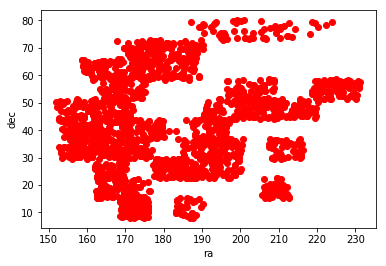

In [25]:
from astropy.time import Time

date = '2019-05-16'
mjd_date = Time(date).mjd
print(mjd_date)

query = "select * from detections where jd>="+str(mjd_date)

df4 = sql_query(query)
df4 = df4.sort_values(['oid'])

#display(df4.head(n=10))
display(df4)

plt.plot(df4['ra'].astype(float),df4['dec'].astype(float),'ro')
plt.xlabel('ra')
plt.ylabel('dec')
